(Trial code, officiial implementation is in code 5)
Removes the background colours using the values from the previous code.
(You need to copy paste the values where specified in this code)

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
image = cv2.imread('pinkneck.jpg')
#image = image[250:1750 , 800:2000]
# small = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 
# vsmall = cv2.resize(small, (0,0), fx=0.5, fy=0.5) 
# vlc = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(vlc)

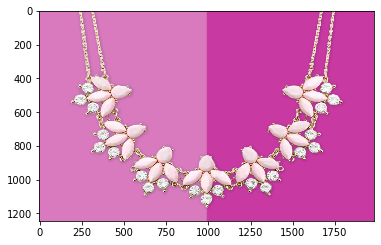

In [5]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(rgb)

In [6]:
#Theese values need to be taken from the 2_hsv_trackbar code
u_green = np.array([179, 101, 255])
l_green = np.array([0, 0, 93])

In [7]:
mask = cv2.inRange(hsv, l_green, u_green)
#masking HSV value selected color becomes black
# mask = cv2.bitwise_not(mask)
res = cv2.bitwise_and(rgb,rgb, mask=mask)

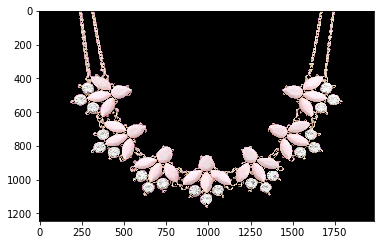

In [8]:
new_image = Image.fromarray(res)
plt.imshow(new_image)
#Run the below line if you want save the image
# new_image.save("reverse_hsv232.png")

The below codes are to try reduce noise, unnecessary for our implementation

In [9]:
kernel = np.ones((3,3),np.uint8)

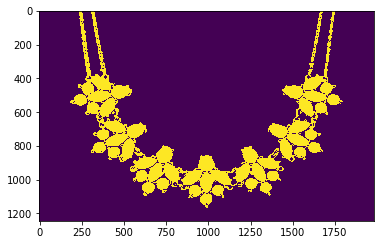

In [10]:
plt.imshow(mask)

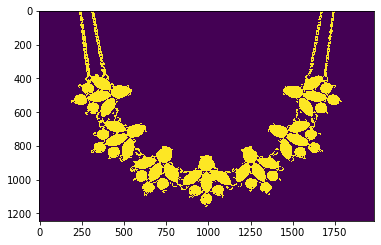

In [11]:
erosion = cv2.erode(mask,kernel,iterations = 1)
plt.imshow(erosion)

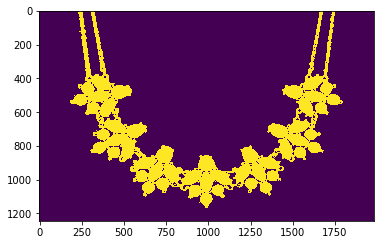

In [12]:
dilation = cv2.dilate(mask,kernel,iterations = 1)
plt.imshow(dilation)

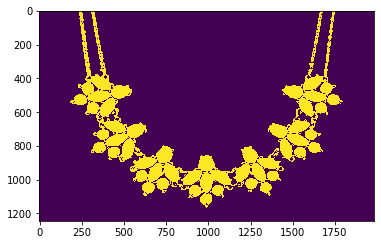

In [13]:
#erosion and dialation
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

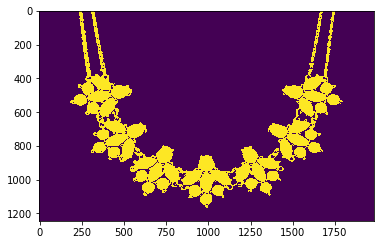

In [14]:
#dialation and erosion
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

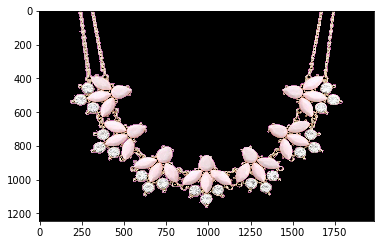

In [15]:
res = cv2.bitwise_and(rgb,rgb, mask=dilation)
new_image = Image.fromarray(res)
plt.imshow(new_image)
# new_image.save("test46.png")